In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt


In [36]:
import os
print(os.listdir())

['.android', '.conda', '.condarc', '.ipynb_checkpoints', '.ipython', '.jupyter', '.leonflix', '.matplotlib', '.packettracer', '.spyder-py3', '.VirtualBox', 'anaconda3', 'AppData', 'Application Data', 'BMI-Classification (1).ipynb', 'BMI-Classification.ipynb', 'Cisco Packet Tracer 7.1', 'Contacts', 'Cookies', 'Creative Cloud Files', 'd4ac4633ebd6440fa397b84f1bc94a3c.7z', 'Data_Kelas_TKJ1.csv', 'Desktop', 'Downloads', 'Favorites', 'GNS3', 'inittk.ini', 'inst.ini', 'IntelGraphicsProfiles', 'Kasifikasi-Beratbadan.ipynb', 'Links', 'Local Settings', 'MicrosoftEdgeBackups', 'My Documents', 'NetHood', 'Nox_share', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{a6860b28-ca11-11ea-843f-d2e77642650a}.TM.blf', 'NTUSER.DAT{a6860b28-ca11-11ea-843f-d2e77642650a}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{a6860b28-ca11-11ea-843f-d2e77642650a}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'nuuid.ini', 'OneDrive', 'PrintHood', 'Recent', 'Saved Games', 'Searc

In [37]:
data = pd.read_csv('Data_Kelas_TKJ1.csv')
data_visual = pd.read_csv('Data_Kelas_TKJ1.csv')

In [38]:
data.head()

,Gender,Height,Weight,Index,Nama
0,Male,174,96,4,Aditya-Arisandi
1,Female,189,87,2,Aini-Rahmah
2,Female,185,110,4,Ana-nurlaila
3,Female,195,104,3,Ana-Rosdiana-Mila
4,Female,149,61,3,Anisa-Maulia


In [40]:
data.columns=['Gender','Height','Weight','Index','Nama' ]

In [41]:
data.shape

(29, 5)

In [42]:
data.isnull().any()

Gender    False
Height    False
Weight    False
Index     False
Nama      False
dtype: bool

In [43]:
sns.__version__

'0.10.1'

In [44]:
def convert_status_to_description(x):
    if x['Index'] == 0:
        return 'Extremely Weak'
    elif x['Index'] == 1:
        return 'Weak'
    elif x['Index'] == 2:
        return 'Normal'
    elif x['Index'] == 3:
        return 'Overweight'
    elif x['Index']== 4:
        return 'Obesity'
    elif x['Index'] == 5:
        return 'Extreme Obesity'
data_visual['Status'] = data_visual.apply(convert_status_to_description,axis=1)
data_visual.head()

,Gender,Height,Weight,Index,Nama,Status
0,Male,174,96,4,Aditya-Arisandi,Obesity
1,Female,189,87,2,Aini-Rahmah,Normal
2,Female,185,110,4,Ana-nurlaila,Obesity
3,Female,195,104,3,Ana-Rosdiana-Mila,Overweight
4,Female,149,61,3,Anisa-Maulia,Overweight


In [45]:
def convert_gender_to_label(x):
    if x['Gender'] == 'Male':
        return 1
    elif x['Gender'] == 'Female':
        return 0
data_visual['gender_lbl'] = data_visual.apply(convert_gender_to_label,axis=1)
data_visual.head()

,Gender,Height,Weight,Index,Nama,Status,gender_lbl
0,Male,174,96,4,Aditya-Arisandi,Obesity,1
1,Female,189,87,2,Aini-Rahmah,Normal,0
2,Female,185,110,4,Ana-nurlaila,Obesity,0
3,Female,195,104,3,Ana-Rosdiana-Mila,Overweight,0
4,Female,149,61,3,Anisa-Maulia,Overweight,0


C:\Users\User\anaconda3\lib\site-packages\seaborn\regression.py:573: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


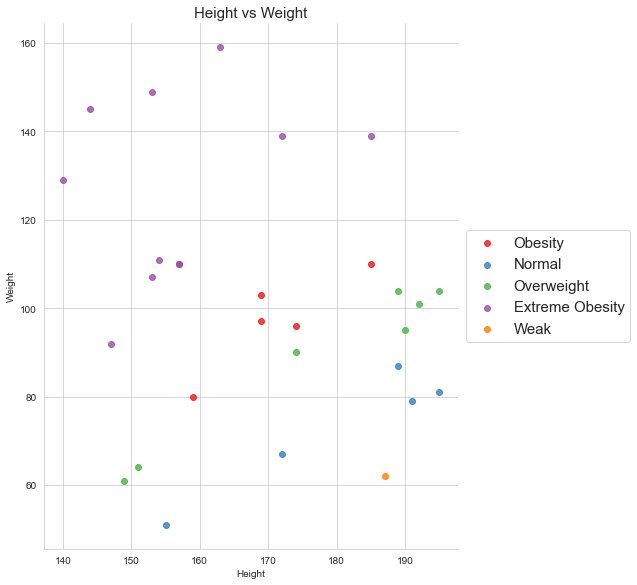

In [46]:
sns.set_style('whitegrid')

# colors = ['#66c2a5','#fc8d62','#8da0cb','#e78ac3','#a6d854','#ffd92f']
## http://colorbrewer2.org/#type=qualitative&scheme=Set2&n=6

# plt.scatter(x='Height',y='Weight',data=data_visual,c=data_visual['Index'],
#             cmap=matplotlib.colors.ListedColormap(colors))
# plt.colorbar()

## https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category

sns.lmplot( x='Height', y='Weight', data=data_visual, 
           fit_reg=False, 
           hue='Status', 
           legend=False, 
           palette='Set1',
           size = 8, 
           aspect = 1
          )
ax1 = plt.gca()
ax1.set_title('Height vs Weight', size=15)

## https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot

# Shrink current axis by 20%
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# Put a legend to the right of the current axis
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 15})

In [47]:
people = data_visual['Gender'].value_counts() 
# Returns object containing counts of unique values.
# The resulting object will be in descending order so that the first element is the most frequently-occurring element. 
# Excludes NA values by default.
print(type(people))
people.head()

<class 'pandas.core.series.Series'>


Female    21
Male       8
Name: Gender, dtype: int64

In [48]:
categories = data_visual['Status'].value_counts() 
categories

Extreme Obesity    11
Overweight          7
Obesity             5
Normal              5
Weak                1
Name: Status, dtype: int64

In [49]:
data_visual_male = data_visual[data_visual['Gender']=='Male']
data_visual_male.head()

,Gender,Height,Weight,Index,Nama,Status,gender_lbl
0,Male,174,96,4,Aditya-Arisandi,Obesity,1
5,Male,189,104,3,Bambang-Triyoso,Overweight,1
16,Male,157,110,5,Kusaendi,Extreme Obesity,1
19,Male,172,139,5,Nizar-Tegar-anandi,Extreme Obesity,1
22,Male,169,97,4,Rudityo-Himawan,Obesity,1


In [50]:
data_visual_female = data_visual[data_visual['Gender']=='Female']
data_visual_female.head()

,Gender,Height,Weight,Index,Nama,Status,gender_lbl
1,Female,189,87,2,Aini-Rahmah,Normal,0
2,Female,185,110,4,Ana-nurlaila,Obesity,0
3,Female,195,104,3,Ana-Rosdiana-Mila,Overweight,0
4,Female,149,61,3,Anisa-Maulia,Overweight,0
6,Female,147,92,5,Dedi-Aryanto,Extreme Obesity,0


In [51]:
data_visual_female_categories = data_visual_female['Status'].value_counts()
data_visual_female_categories

Extreme Obesity    8
Overweight         5
Normal             4
Obesity            3
Weak               1
Name: Status, dtype: int64

In [52]:
data["BMI"]=data['Weight']/(data['Height']/100)**2

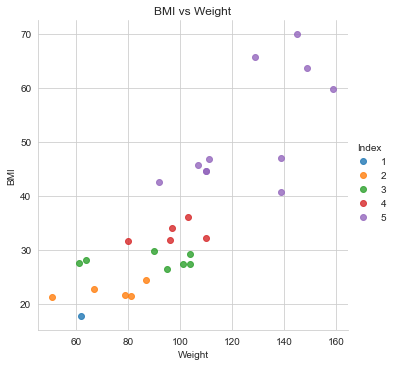

In [54]:
sns.lmplot(data=data,x="Weight",y="BMI",fit_reg=False,hue="Index") ## Hue is for differentiating between healths
plt.title("BMI vs Weight")
plt.show()

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

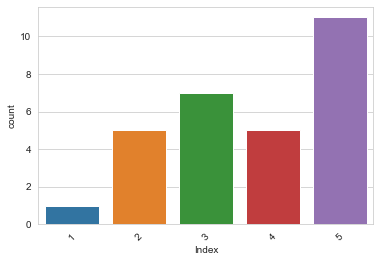

In [55]:
sns.countplot(x="Index",data=data)
plt.xticks(rotation=45)